In [1]:
# Peter Nelson 30/9/19
# Code for use at the FASTBLADE facility, determining where to place hydraulic rams to best simulate desired loading on 
# testing specimen. This code has different modes for different inputs. One mode uses target shear & bending data and the
# other modes use only either target load, shear or bending data. The code uses a genetic algorithm to solve an objective
# function that is minimised when the difference between the desired and actual shear force distributions is at a global 
# minimum. The code implicitly ensures that the desired bending moment distribution is simulated by ensuring that the sum 
# of ratios required is achieved. The code also accepts inputs for how many rams are present in the sytem and upper and 
# lower bounds for ram positions.

In [2]:
import pandas as pd
import numpy as np
data = pd.read_excel(r"C:\Users\Peter's 2nd Laptop\Documents\MATLAB\FB again\Matlab Code No Contraints\testdata.xlsx")
number_rams=4
print(data)

    radial position        Fx       Fy
0          0.000000  1241.850 -228.450
1        205.128205  1230.165 -230.970
2        615.384615  1227.285 -224.010
3       1025.641026  1215.285 -215.760
4       1435.897436  1194.600 -206.355
5       1846.153846  1165.680 -195.930
6       2256.410256  1128.990 -184.605
7       2666.666667  1084.965 -172.515
8       3076.923077  1034.055 -159.795
9       3487.179487   976.695 -146.565
10      3897.435897   913.350 -132.945
11      4307.692308   844.470 -119.085
12      4717.948718   770.505 -105.105
13      5128.205128   691.875  -91.140
14      5538.461538   609.060  -77.310
15      5948.717949   522.495  -63.765
16      6358.974359   432.630  -50.610
17      6769.230769   339.915  -37.980
18      7179.487179   244.800  -26.010
19      7589.743590   147.720  -14.835
20      8000.000000    49.125   -4.575


# Defining x, Fx, Fy

In [3]:
from numpy import interp

nodes=100
radpos=data['radial position']
Fxin=data['Fx']
Fyin=data['Fy']

dps=len(data)-1
L=data['radial position'][dps]

x=list(range(0,nodes))
b=L/(nodes-1)
x[:] = [ __ * b for __ in x]

Fx=interp(x,radpos,Fxin)
Fy=interp(x,radpos,Fyin)

# Integrating & Defining Targets

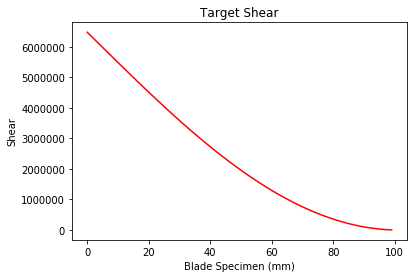

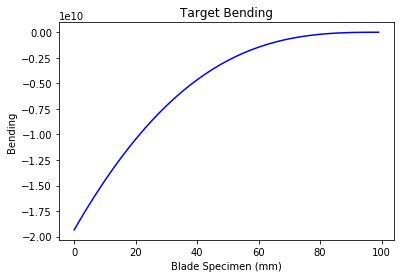

In [4]:
import scipy 
import numpy
from scipy import integrate
from numpy import append
from numpy import trapz
from numpy import insert
import matplotlib.pyplot as plt
%matplotlib inline  

integralpart=scipy.integrate.cumtrapz(Fx, x)
integralpart=numpy.insert(integralpart,0,0)
TF=integralpart[-1]

TargetShear=TF-integralpart[0]

for k in range(2,len(integralpart)):
    TargetShear=np.append(TargetShear,TF-integralpart[k-1])
TargetShear=np.append(TargetShear,0)

integralPart=scipy.integrate.cumtrapz(TargetShear,x)
integralPart=numpy.insert(integralPart,0,0)
bmax=integralPart[-1]

TargetBending=bmax-integralPart[0]

for k in range(2,len(integralPart)):
    TargetBending=np.append(TargetBending,bmax-integralPart[k-1])
TargetBending=np.append(TargetBending,0)
TargetBending=TargetBending*-1


plt.plot(TargetShear,'r')
plt.xlabel('Blade Specimen (mm)')
plt.ylabel('Shear')
plt.title('Target Shear')
plt.show()

plt.plot(TargetBending,'b')
plt.xlabel('Blade Specimen (mm)')
plt.ylabel('Bending')
plt.title('Target Bending')
plt.show()

# Using rules to get solver inputs

In [5]:
F=TF/number_rams;
SumRatios=number_rams*((max(abs(TargetBending))/max(TargetShear)))/L

Shear=[None]*(number_rams+1)
for i in range(0,number_rams+1):
    Shear[i]=TF-F*i
    
Shear=list(Shear)
print(Shear)

[6482798.236914601, 4862098.677685951, 3241399.1184573006, 1620699.5592286503, 0.0]


# Creating Actual Shear Function 

In [6]:
def AcSh(x,sol,Shear):
    ActualShear=[]
    for j in range(0,len(Shear)):
        for i in range(0,len(x)):
            if (x[i])>=sol[j] and (x[i])<sol[j+1]:
                ActualShear=np.append(ActualShear, (Shear[j]))
    return ActualShear

# LSQ Function

In [7]:
def objective2(x,Shear,sol,TargetShear):
    lsq_l=[None]*len(x)
    for i in range(0,len(x)):
        lsq_l[i]= abs(AcSh(x,sol,Shear)[i]-TargetShear[i])
    return sum(lsq_l)

In [8]:
def objective(x,Shear,sol,TargetShear):
    lsq_l=[]
    for i in range(0,len(x)):
        lsq_l=np.append(lsq_l, abs(AcSh(x,sol,Shear)[i]-TargetShear[i]))
    return sum(lsq_l)

In [12]:
print(objective(x,Shear,[0, 1000,2500,5500,7500,8000],TargetShear))

94004615.27089067


In [13]:
print(objective2(x,Shear,[0, 1000,2500,5500,7500,8000],TargetShear))

94004615.27089067


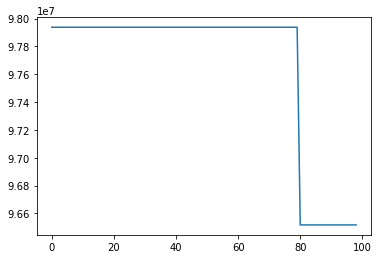

In [20]:
store=[]

for zz in range (1,100):
    sol=[0,zz,2500,5500,7500,8000]
    value=objective(x,Shear,sol,TargetShear)
    store=np.append(store, value)

    
import matplotlib.pyplot as plt
plt.plot(store)

In [15]:
print(objective(x,Shear,[2,1000,2500,5500,7500,8000],TargetShear))
print(objective(x,Shear,[0, 1000,2500,5500,7500,8000],TargetShear))

IndexError: index 99 is out of bounds for axis 0 with size 99

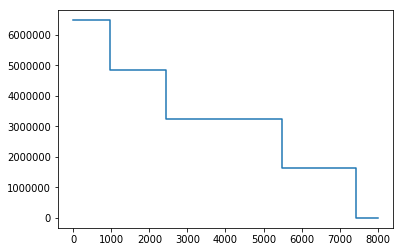

In [16]:
sol=[0, 1000,2500,5500,7500,8000]
ActualShear=[]

for j in range(0,len(Shear)):

    for i in range(0,len(x)):
        
        checkone=(x[i])>=sol[j]
        checktwo=(x[i])<sol[j+1]
        
        if checkone==True and checktwo==True:
            ActualShear=np.append(ActualShear, (Shear[j]))

    
import matplotlib.pyplot as plt
plt.step(x, ActualShear)
plt.show()

# Solver Experimentation

In [7]:
z = np.linspace(0, 8, 10)

condlist=[z<5] # can include additional conds here
funclist=[0,1]



np.piecewise(z, condlist, funclist)

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1.])

# Possible Data Input Structure

In [8]:
if 'Fx' in list(data):
    
    if 'Shear' in list(data):
        
        if 'Bending' in list(data):
            pass                        # All Three
       
    elif 'Bending' in list(data):
        pass                            # Fx & Bending
   
    else:
        print('load only')              # Fx Only
    
elif 'Shear' in list(data):
    
    if 'Bending' in list(data):
        pass                            # Shear & Bending
    
    else:
        pass                            # Shear Only
    
elif 'Bending' in list(data):
    pass                                # Bending Only

else:
    print('Error- no suitable input names!!')

load only
